In [1]:
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [74]:
def analyse(file_pattern, title=None):
    dfs = []
    for f in glob.glob(f"../results/{file_pattern}"):
        print(f)
        df = pd.read_csv(f)    
        m = int(f.split("/")[-1].split("-")[4][1:])
        df["m"] = m
        dfs.append(df)
    
    df = pd.concat(dfs)
    
    mean_win = df.groupby(["acquire_pairs_function", "m"]).win.mean().unstack()
    std = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).std().unstack()
    n = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).count().unstack()
    c = df.groupby(["acquire_pairs_function", "m"]).win.count().unstack() / n
    stderr = std / (n**0.5)

    if title is not None:
        print("=========================================")
        print(f" {title}") 
        print("=========================================")
    
    print("============= WIN RATE ============")
    display(mean_win)
    print("============= STD ERR ============")
    display(stderr)
    print("============= NUM SEEDS ============")
    display(n)
    print("============= EVAL DATAPOINTS PER SEED ============")
    display(c)
    
    colors = matplotlib.colormaps["Set1"]
    fig, ax = plt.subplots(figsize=(10, 8))
    
    mean_win_per_seed = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().reset_index()
    
    for i, apf in enumerate(sorted(set(df["acquire_pairs_function"]))):
        data = mean_win_per_seed[mean_win_per_seed.acquire_pairs_function == apf]
        ax.scatter(data["m"], data["win"], color=colors(i), marker="x", alpha=0.5, s=8)
        line_data = pd.DataFrame(data.groupby("m").win.mean())
        line_data["std"] = data.groupby("m").win.std()
        line_data["stderr"] = line_data["std"] / data.groupby("m").win.count()**0.5 
        line_data = line_data.reset_index()
            
        ax.errorbar(line_data["m"], line_data["win"], yerr=line_data["stderr"], capsize=5, c=colors(i), label=apf)
        #display(line_data)
    
    ax.legend();

../results/post-eval-winrate-imdb-m128-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m256-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m512-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m768-xmas-sweep2.csv
 IMDB - 50 epochs per training cycle
============= WIN RATE ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.675781,0.816189,0.874783,0.901042
HIGH_ENTROPY_AND_CERTAINTY,0.680990,0.812174,0.894097,0.915473
RANDOM,0.670464,0.760525,0.845703,0.882161


============= STD ERR ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.003148,0.004786,0.007216,0.003521
HIGH_ENTROPY_AND_CERTAINTY,0.003930,0.007491,0.006302,0.005371
RANDOM,0.011509,0.008925,0.004939,0.004238


============= NUM SEEDS ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,9,9,9,9
HIGH_ENTROPY_AND_CERTAINTY,9,9,9,9
RANDOM,9,9,9,9


============= EVAL DATAPOINTS PER SEED ============


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,1024.0,1024.0,1024.0,1024.0
HIGH_ENTROPY_AND_CERTAINTY,1024.0,1024.0,1024.0,1024.0
RANDOM,1024.0,1024.0,1024.0,1024.0


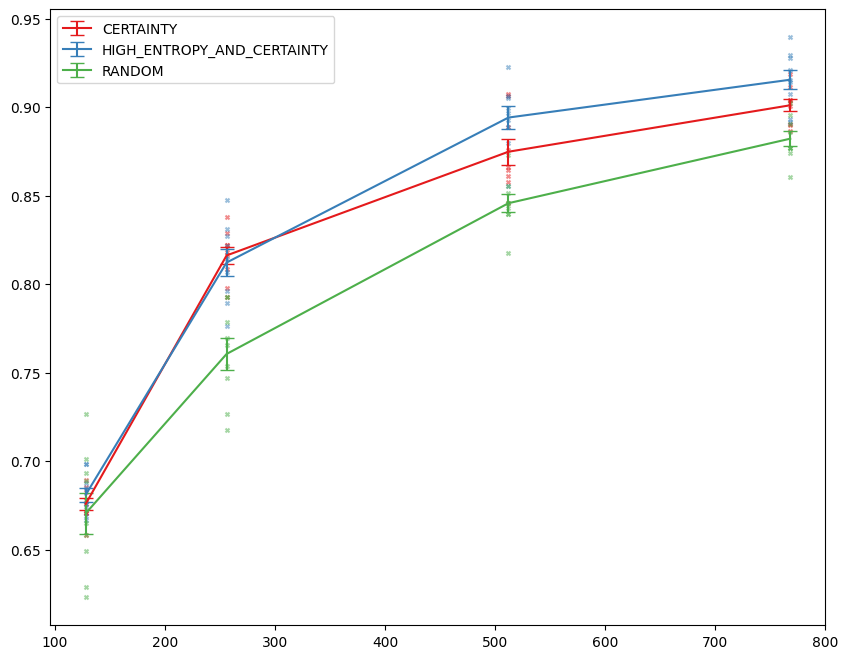

In [77]:
analyse("post-eval-winrate-imdb-m*-xmas-sweep2.csv", "IMDB - 50 epochs per training cycle")

../results/post-eval-winrate-tldr-m512-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m0-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m384-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m256-xmas-sweep2.csv
../results/post-eval-winrate-tldr-m128-xmas-sweep2.csv
 TLDR - Adam, 70 epochs per training
============= WIN RATE ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,0.523763,0.561849,0.584744,0.600369
HIGH_ENTROPY_AND_CERTAINTY,NaN,0.528537,0.546224,0.592665,0.592339
RANDOM,0.394206,0.510200,0.550998,0.550564,0.560764


============= STD ERR ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,0.011730,0.011786,0.009947,0.008984
HIGH_ENTROPY_AND_CERTAINTY,NaN,0.005567,0.009509,0.006927,0.009559
RANDOM,0.002966,0.007517,0.010700,0.008515,0.010705


============= NUM SEEDS ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,9.0,9.0,9.0,9.0
HIGH_ENTROPY_AND_CERTAINTY,NaN,9.0,9.0,9.0,9.0
RANDOM,9.0,9.0,9.0,9.0,9.0


============= EVAL DATAPOINTS PER SEED ============


m,0,128,256,384,512
acquire_pairs_function,,,,,
CERTAINTY,NaN,1024.0,1024.0,1024.0,1024.0
HIGH_ENTROPY_AND_CERTAINTY,NaN,1024.0,1024.0,1024.0,1024.0
RANDOM,1024.0,1024.0,1024.0,1024.0,1024.0


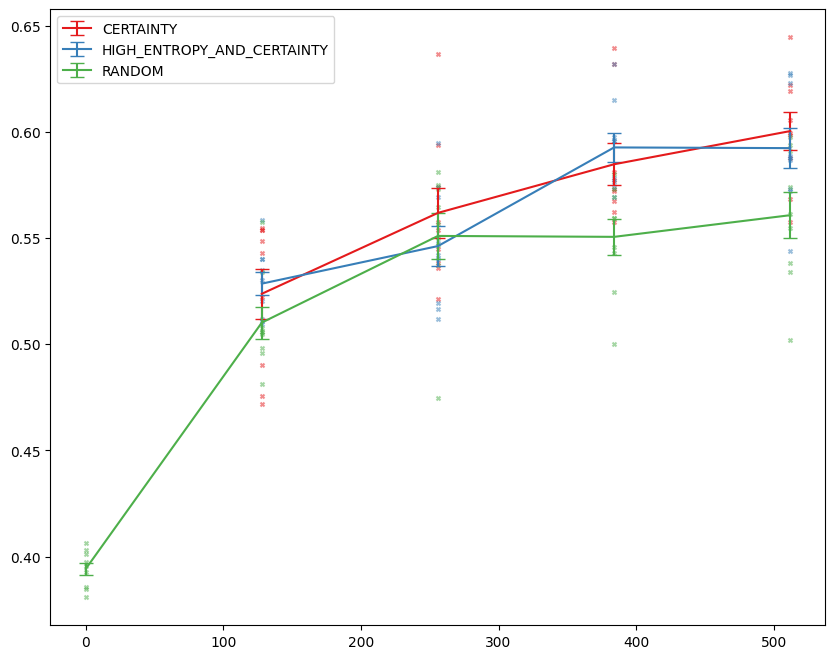

In [78]:
analyse("post-eval-winrate-tldr-m*-xmas-sweep2.csv", "TLDR - Adam, 70 epochs per training")

../results/post-eval-winrate-imdb-m512-xmas-lora.csv
../results/post-eval-winrate-imdb-m768-xmas-lora.csv
../results/post-eval-winrate-imdb-m256-xmas-lora.csv
 IMDB - LoRA, RMSprop, 10 epochs per training cycle
============= WIN RATE ============


m,256,512,768
acquire_pairs_function,,,
CERTAINTY,0.838108,0.876519,0.90408
RANDOM,0.861762,0.894965,0.90625


============= STD ERR ============


m,256,512,768
acquire_pairs_function,,,
CERTAINTY,0.012077,0.011392,0.006481
RANDOM,0.009573,0.008776,0.008668


============= NUM SEEDS ============


m,256,512,768
acquire_pairs_function,,,
CERTAINTY,9,9,9
RANDOM,9,9,9


============= EVAL DATAPOINTS PER SEED ============


m,256,512,768
acquire_pairs_function,,,
CERTAINTY,512.0,512.0,512.0
RANDOM,512.0,512.0,512.0


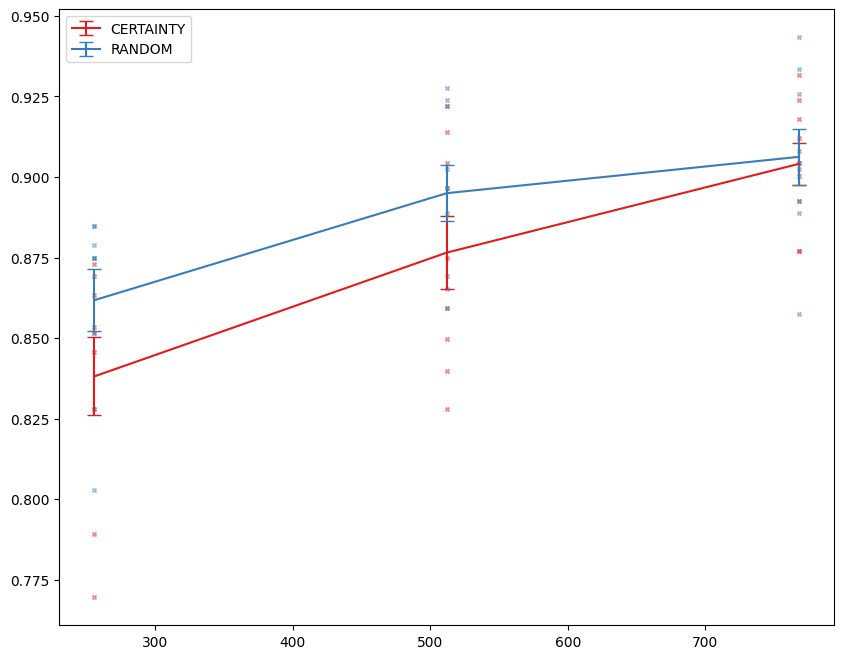

In [79]:
analyse("post-eval-winrate-imdb-m*-xmas-lora.csv", "IMDB - LoRA, RMSprop, 10 epochs per training cycle")